# Importing required libraries

In [ ]:
import tensorflow as tfy
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


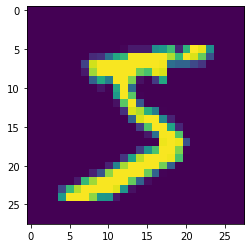

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

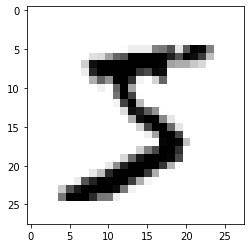

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

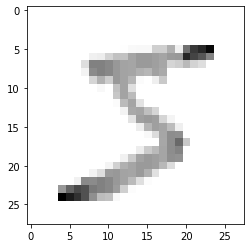

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(x_train[0])

In [ ]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
model = Sequential()

# layer 1
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 2
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# fully connected layer 3
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 79s 59ms/step - loss: 0.3311 - accuracy: 0.8966 - val_loss: 0.1181 - val_accuracy: 0.9626
Epoch 2/5
1313/1313 [==============================] - 73s 55ms/step - loss: 0.1045 - accuracy: 0.9685 - val_loss: 0.1018 - val_accuracy: 0.9688
Epoch 3/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0764 - accuracy: 0.9762 - val_loss: 0.0757 - val_accuracy: 0.9778
Epoch 4/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0581 - accuracy: 0.9820 - val_loss: 0.0667 - val_accuracy: 0.9802
Epoch 5/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.0638 - val_accuracy: 0.9808


In [ ]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("test loss on 10000 test samples : ",test_loss)
print("validation Accuracy on 10000 test samples : ",test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0601 - accuracy: 0.9834
test loss on 10000 test samples :  0.06012379005551338
validation Accuracy on 10000 test samples :  0.9833999872207642


In [ ]:
predictions = model.predict([x_testr])
print(predictions)

313/313 [==============================] - 5s 14ms/step
[[9.89639830e-07 1.06090158e-06 1.77078673e-05 ... 9.99928534e-01
  6.42730924e-07 7.33628076e-06]
 [2.53032282e-04 8.69281848e-07 9.99702930e-01 ... 1.49228626e-05
  2.18357445e-06 1.13053065e-05]
 [2.04378443e-06 9.99978602e-01 3.27326234e-07 ... 3.00267584e-06
  6.20717537e-06 4.81416976e-07]
 ...
 [5.27968647e-09 4.61479976e-06 4.55509337e-08 ... 5.15337842e-06
  5.25513497e-06 5.31693377e-06]
 [1.30950342e-04 3.16290823e-07 1.72680609e-06 ... 1.88012791e-07
  2.34904321e-04 5.30920443e-05]
 [1.31649585e-05 1.51067674e-08 1.66644361e-06 ... 4.96075669e-09
  3.92961283e-06 3.08091353e-06]]


In [ ]:
print(np.argmax(predictions[99]))

9


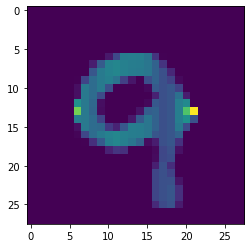

In [ ]:
plt.imshow(x_test[99])

In [ ]:
img = cv2.imread("/content/five.png")

TypeError: ignored

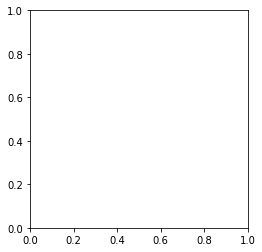

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [ ]:
newimg = tf.keras.utils.normalize(resized,axis=1)

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
newimg.shape

In [ ]:
print(np.argmax(model.predict(newimg)))